In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

### load and understand the data

In [224]:
df = pd.read_excel(r"C:\Users\akhil\Downloads\Churn (1).xlsx")

In [225]:
df.head()

Unnamed: 0 state      area.code  account.length voice.plan  voice.messages  \
0           1    KS  area_code_415             128        yes              25   
1           2    OH  area_code_415             107        yes              26   
2           3    NJ  area_code_415             137         no               0   
3           4    OH  area_code_408              84         no               0   
4           5    OK  area_code_415              75         no               0   

  intl.plan  intl.mins  intl.calls  intl.charge  ...  day.calls  day.charge  \
0        no       10.0           3         2.70  ...        110       45.07   
1        no       13.7           3         3.70  ...        123       27.47   
2        no       12.2           5         3.29  ...        114       41.38   
3       yes        6.6           7         1.78  ...         71        50.9   
4       yes       10.1           3         2.73  ...        113       28.34   

  eve.mins eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0    197.4        99       16.78       244.7           91         11.01   
1    195.5       103       16.62       254.4          103         11.45   
2    121.2       110       10.30       162.6          104          7.32   
3     61.9        88        5.26       196.9           89          8.86   
4    148.3       122       12.61       186.9          121          8.41   

   customer.calls  churn  
0               1     no  
1               1     no  
2               0     no  
3               2     no  
4               3     no  

[5 rows x 21 columns]

In [228]:
df.shape

(5000, 21)

In [230]:
df.dtypes

Unnamed: 0          int64
state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge         object
eve.mins           object
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [234]:
df.describe()

Unnamed: 0  account.length  voice.messages    intl.mins   intl.calls  \
count  5000.000000      5000.00000     5000.000000  5000.000000  5000.000000   
mean   2500.500000       100.25860        7.755200    10.261780     4.435200   
std    1443.520003        39.69456       13.546393     2.761396     2.456788   
min       1.000000         1.00000        0.000000     0.000000     0.000000   
25%    1250.750000        73.00000        0.000000     8.500000     3.000000   
50%    2500.500000       100.00000        0.000000    10.300000     4.000000   
75%    3750.250000       127.00000       17.000000    12.000000     6.000000   
max    5000.000000       243.00000       52.000000    20.000000    20.000000   

       intl.charge     day.mins    day.calls    eve.calls   eve.charge  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      2.771196   180.288900   100.029400   100.191000    17.054322   
std       0.745514    53.894699    19.831197    19.826496     4.296843   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.300000   143.700000    87.000000    87.000000    14.140000   
50%       2.780000   180.100000   100.000000   100.000000    17.090000   
75%       3.240000   216.200000   113.000000   114.000000    19.900000   
max       5.400000   351.500000   165.000000   170.000000    30.910000   

        night.mins  night.calls  night.charge  customer.calls  
count  5000.000000  5000.000000   5000.000000     5000.000000  
mean    200.391620    99.919200      9.017732        1.570400  
std      50.527789    19.958686      2.273763        1.306363  
min       0.000000     0.000000      0.000000        0.000000  
25%     166.900000    87.000000      7.510000        1.000000  
50%     200.400000   100.000000      9.020000        1.000000  
75%     234.700000   113.000000     10.560000        2.000000  
max     395.000000   175.000000     17.770000        9.000000

### handle missing and inconsistent values

In [236]:
df.isnull().sum()

Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [238]:
df.duplicated().sum()

0

In [240]:
df.drop(columns = 'Unnamed: 0',inplace = True)

In [242]:
df.head()

state      area.code  account.length voice.plan  voice.messages intl.plan  \
0    KS  area_code_415             128        yes              25        no   
1    OH  area_code_415             107        yes              26        no   
2    NJ  area_code_415             137         no               0        no   
3    OH  area_code_408              84         no               0       yes   
4    OK  area_code_415              75         no               0       yes   

   intl.mins  intl.calls  intl.charge  day.mins  day.calls day.charge  \
0       10.0           3         2.70     265.1        110      45.07   
1       13.7           3         3.70     161.6        123      27.47   
2       12.2           5         3.29     243.4        114      41.38   
3        6.6           7         1.78     299.4         71       50.9   
4       10.1           3         2.73     166.7        113      28.34   

  eve.mins  eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0    197.4         99       16.78       244.7           91         11.01   
1    195.5        103       16.62       254.4          103         11.45   
2    121.2        110       10.30       162.6          104          7.32   
3     61.9         88        5.26       196.9           89          8.86   
4    148.3        122       12.61       186.9          121          8.41   

   customer.calls churn  
0               1    no  
1               1    no  
2               0    no  
3               2    no  
4               3    no

In [244]:
#Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:")
print(numerical_columns)

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge', 'customer.calls']

Categorical Columns:
['state', 'area.code', 'voice.plan', 'intl.plan', 'day.charge', 'eve.mins', 'churn']


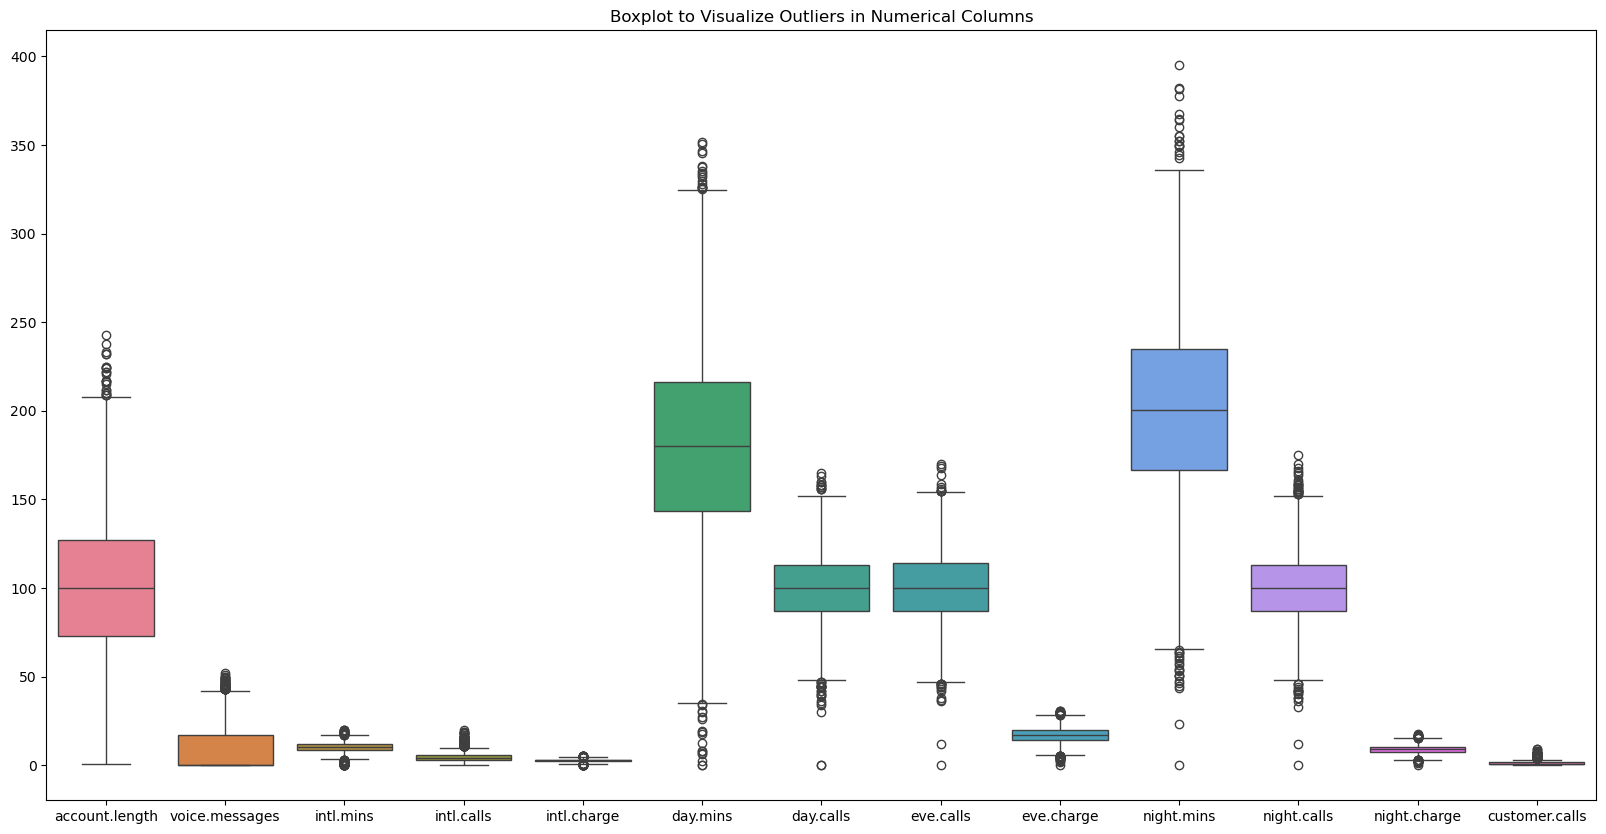

In [246]:
# Plotting boxplots for only numerical columns in the DataFrame
plt.figure(figsize=(20,10))
sns.boxplot(data=df.select_dtypes(include=['float64','int64']))  # Only numerical columns
plt.title("Boxplot to Visualize Outliers in Numerical Columns")
plt.show()

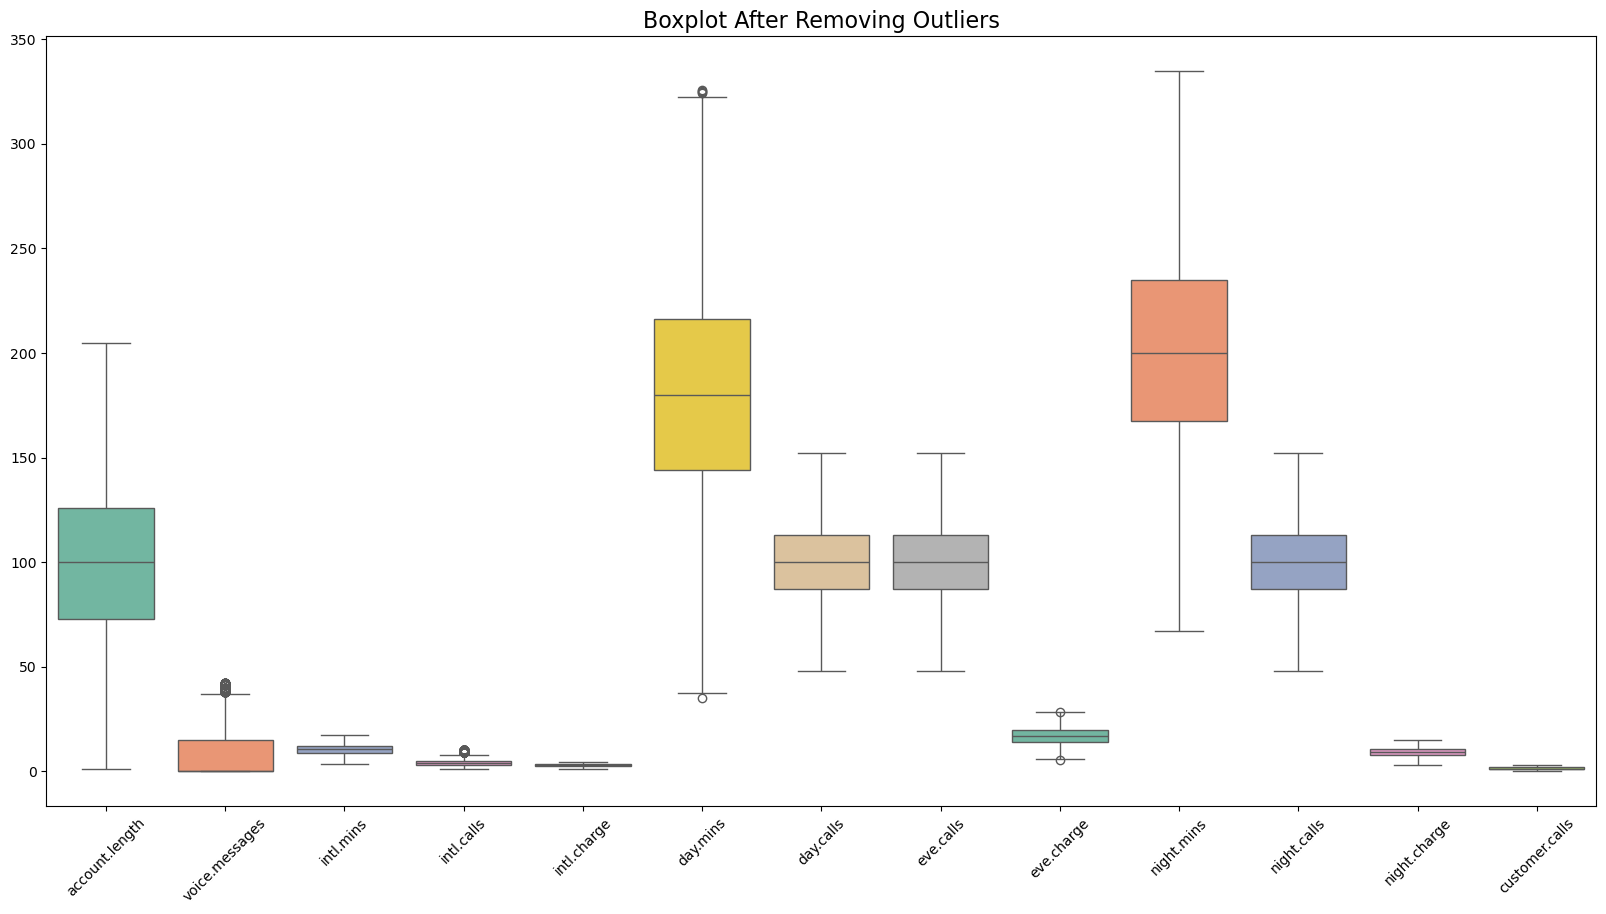

In [248]:
# Define the function to remove outliers using the IQR method
def remove_outliers(df, numerical_columns):
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Keep only the rows within the bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Applying the function to remove outliers from all numeric columns
df_cleaned = remove_outliers(df, numerical_columns)

# Plot boxplot after removing outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_cleaned[numerical_columns], palette="Set2")
plt.title("Boxplot After Removing Outliers", fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [252]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert the categorical columns to numerical data
df_cleaned['voice.plan'] = label_encoder.fit_transform(df_cleaned['voice.plan'])
df_cleaned['intl.plan'] = label_encoder.fit_transform(df_cleaned['intl.plan'])

# Print the updated dataframe to see the changes
print(df_cleaned[['voice.plan', 'intl.plan']])


      voice.plan  intl.plan
0              1          0
1              1          0
2              0          0
4              0          1
5              0          1
...          ...        ...
4994           0          0
4995           1          0
4996           0          0
4997           0          0
4998           0          0

[4145 rows x 2 columns]


In [272]:

# Use pandas get_dummies to apply One-Hot Encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=['state', 'voice.plan', 'intl.plan'], drop_first=True)

# Print the first few rows to see the new one-hot encoded columns
print(df_cleaned.head())


KeyError: "['state'] not in index"

In [268]:
# Remove any leading or trailing spaces from column names
df_cleaned.columns = df_cleaned.columns.str.strip()

# Check column names again
print(df_cleaned.columns)


Index(['area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls', 'churn',
       'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA',
       'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA',
       'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH',
       'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK',
       'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN',
       'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI',
       'state_WV', 'state_WY'],
      dtype='object')


In [270]:
# One-Hot Encoding for 'state' column
df_cleaned = pd.get_dummies(df_cleaned, columns=['state'], drop_first=True)

# Check the transformation
print(df_cleaned.head())


KeyError: "None of [Index(['state'], dtype='object')] are in the [columns]"

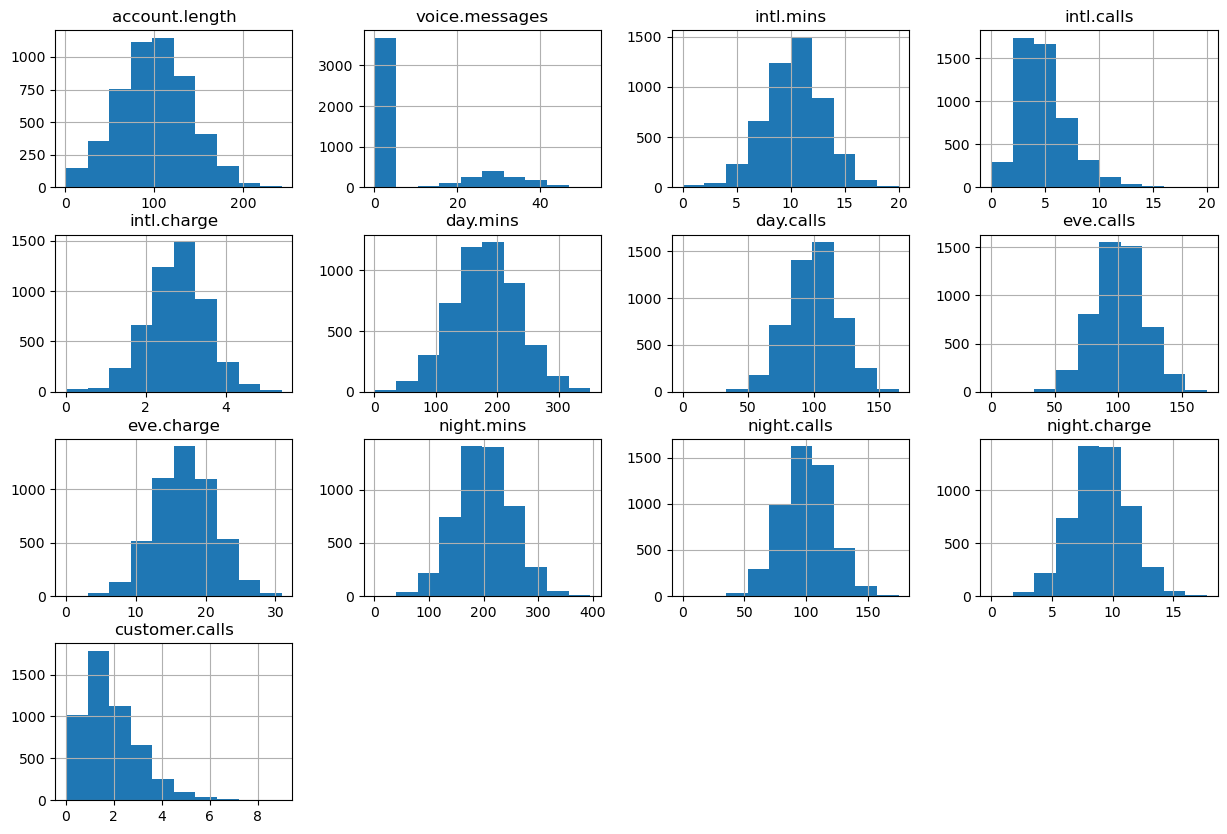

In [148]:
df.hist(figsize=(15,10))
plt.show()

Count Plot for Categorical Columns

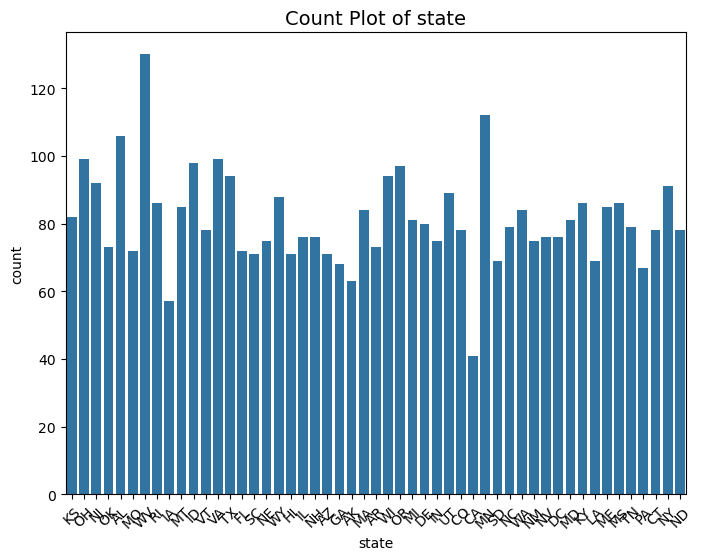

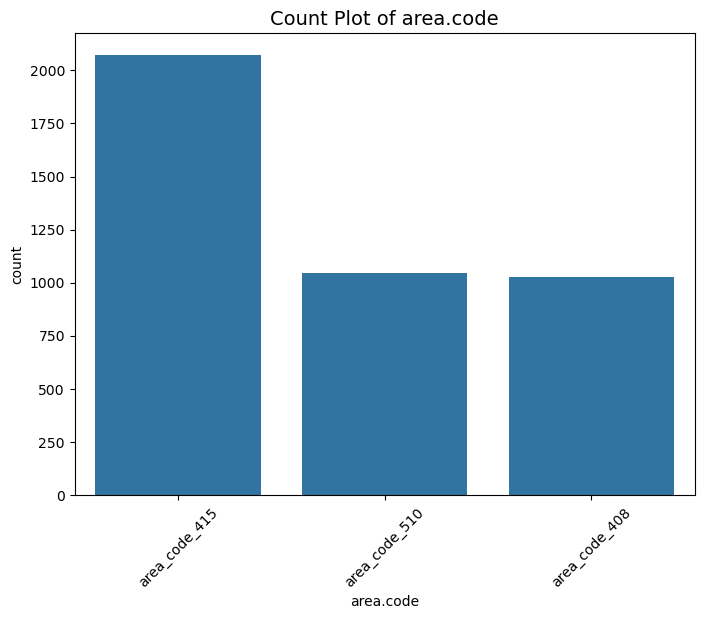

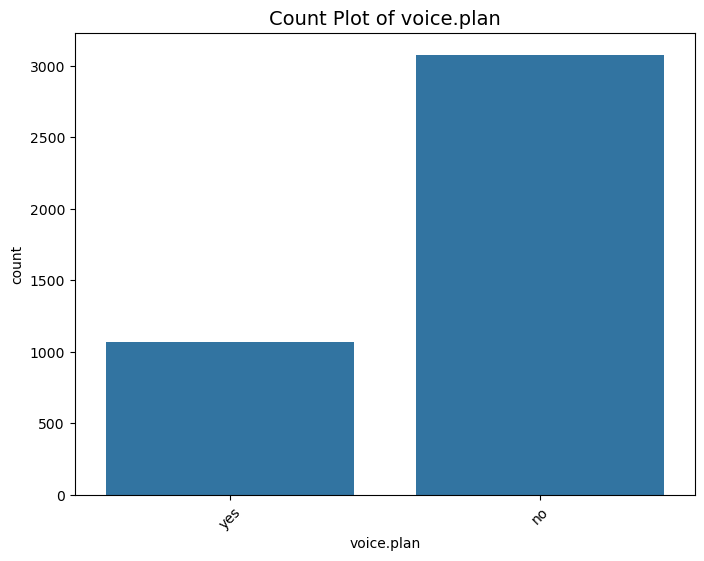

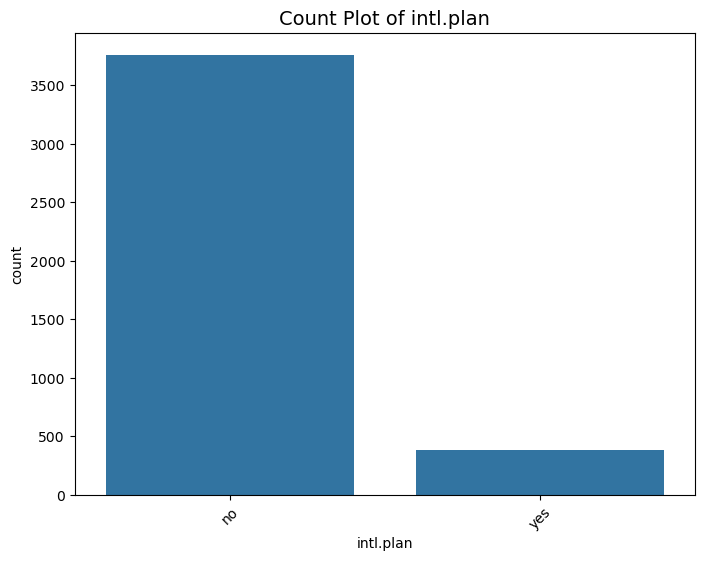

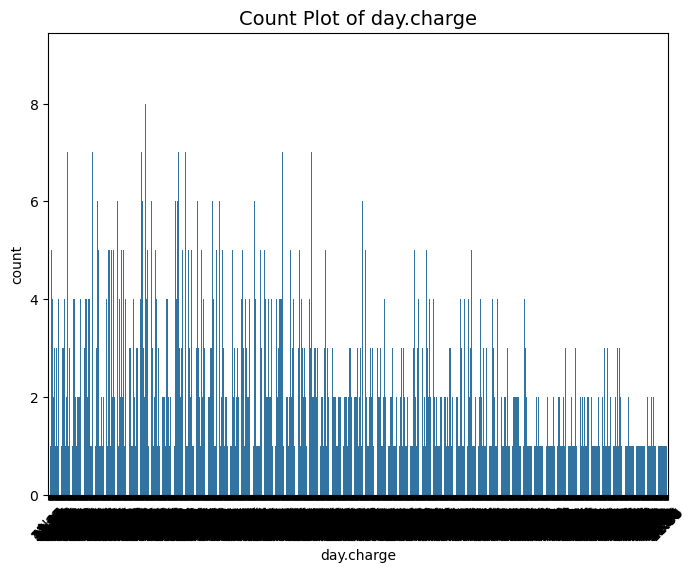

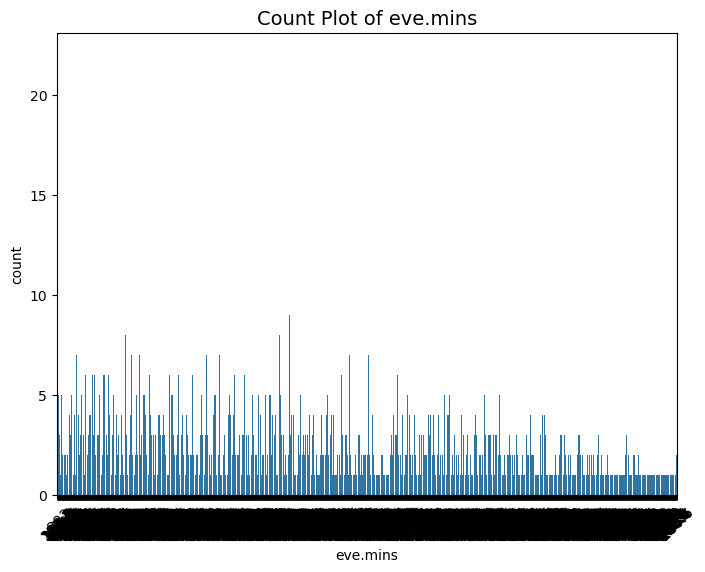

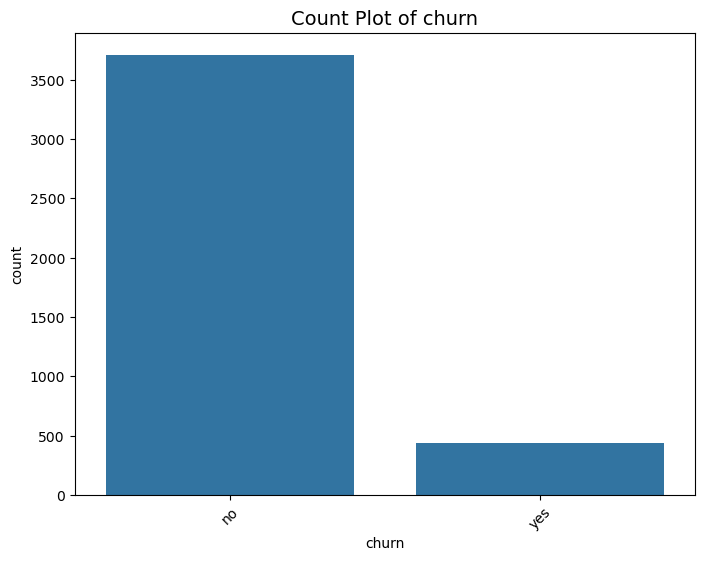

In [155]:
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df_cleaned)
    plt.title(f'Count Plot of {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

Scatter Plot (Selected Numerical Columns)

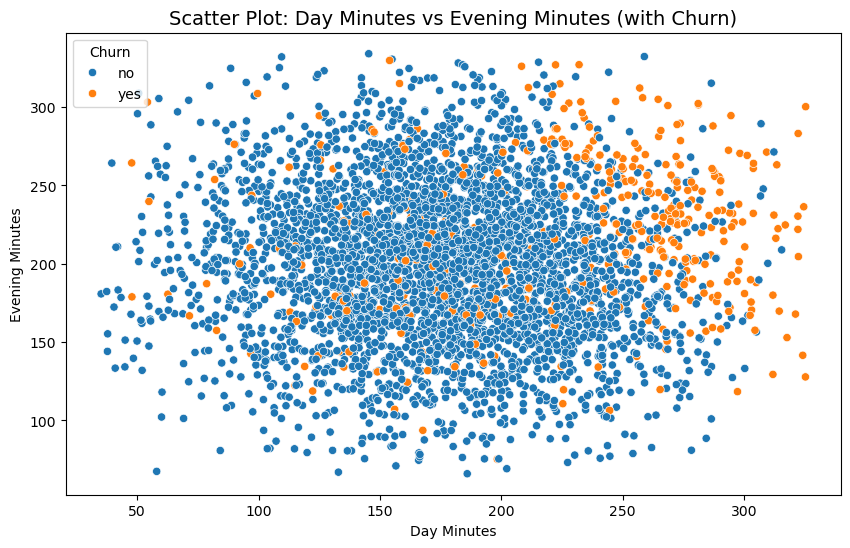

In [163]:
# Convert string "Nan" and other non-standard missing values to NaN
df_cleaned.replace("Nan", np.nan, inplace=True)

# You can drop rows with NaN values in the specific columns you are using for the plot
df_cleaned.dropna(subset=['day.mins', 'eve.mins', 'churn'], inplace=True)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['day.mins'], y=df_cleaned['eve.mins'], hue=df_cleaned['churn'])
plt.title("Scatter Plot: Day Minutes vs Evening Minutes (with Churn)", fontsize=14)
plt.xlabel("Day Minutes")
plt.ylabel("Evening Minutes")
plt.legend(title="Churn", loc="upper left")
plt.show()


Pair Plot (Relationships Between Numerical Variables)

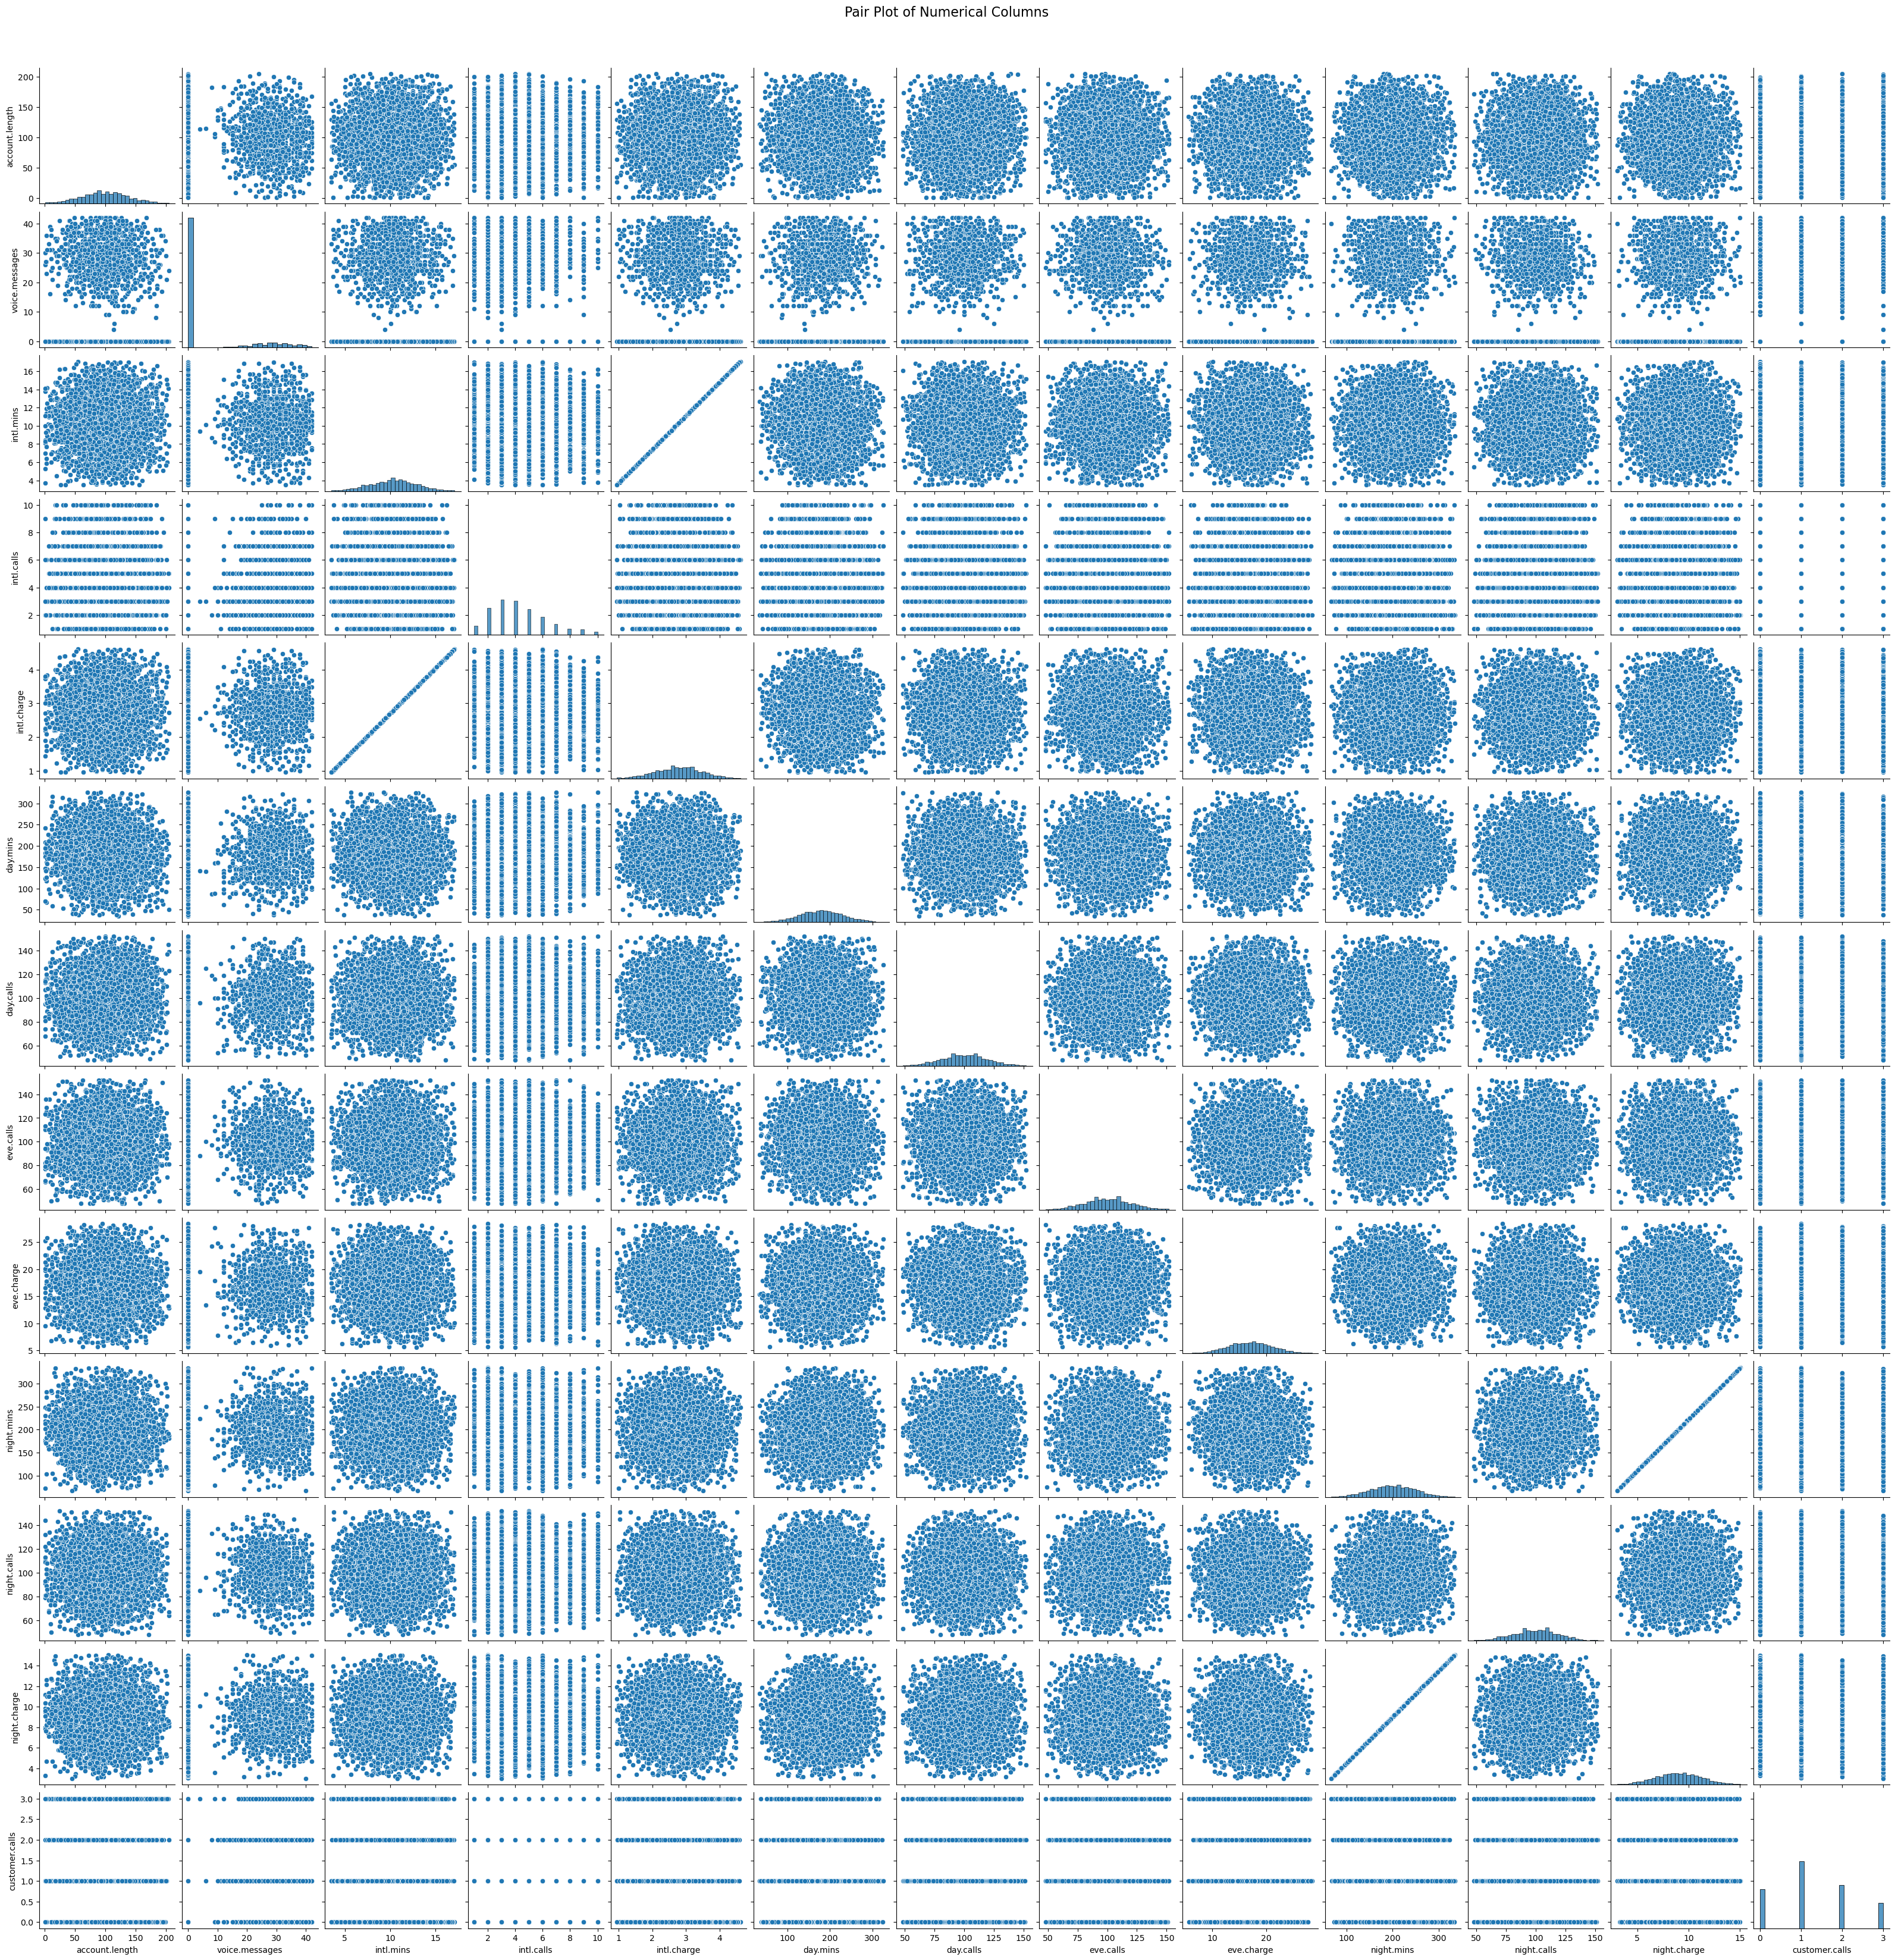

In [175]:
sns.pairplot(df_cleaned[numerical_columns])
plt.suptitle("Pair Plot of Numerical Columns", y=1.02, fontsize=16)
plt.show()

Correlation Heatmap

In [189]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned[numerical_columns].corr()
correlation_matrix

account.length  voice.messages  intl.mins  intl.calls  \
account.length        1.000000       -0.016107   0.017165    0.019719   
voice.messages       -0.016107        1.000000   0.002017   -0.021102   
intl.mins             0.017165        0.002017   1.000000   -0.005986   
intl.calls            0.019719       -0.021102  -0.005986    1.000000   
intl.charge           0.017153        0.002063   0.999991   -0.005860   
day.mins             -0.010635        0.017898  -0.017705   -0.003828   
day.calls             0.028401        0.000734   0.002142    0.013914   
eve.calls             0.017684       -0.007274  -0.003114   -0.002052   
eve.charge           -0.009965        0.019225   0.000557    0.008403   
night.mins           -0.004222        0.003033  -0.007570   -0.006901   
night.calls           0.002430       -0.004459   0.002507    0.001550   
night.charge         -0.004237        0.003034  -0.007567   -0.006874   
customer.calls       -0.010324       -0.012003  -0.008724    0.009289   

                intl.charge  day.mins  day.calls  eve.calls  eve.charge  \
account.length     0.017153 -0.010635   0.028401   0.017684   -0.009965   
voice.messages     0.002063  0.017898   0.000734  -0.007274    0.019225   
intl.mins          0.999991 -0.017705   0.002142  -0.003114    0.000557   
intl.calls        -0.005860 -0.003828   0.013914  -0.002052    0.008403   
intl.charge        1.000000 -0.017676   0.002225  -0.003114    0.000587   
day.mins          -0.017676  1.000000   0.008702   0.000778   -0.009343   
day.calls          0.002225  0.008702   1.000000   0.016111    0.007303   
eve.calls         -0.003114  0.000778   0.016111   1.000000   -0.005603   
eve.charge         0.000587 -0.009343   0.007303  -0.005603    1.000000   
night.mins        -0.007533  0.009163   0.008877   0.017904   -0.020126   
night.calls        0.002496 -0.010874   0.004600  -0.014926    0.006592   
night.charge      -0.007530  0.009146   0.008878   0.017948   -0.020142   
customer.calls    -0.008817 -0.005934  -0.023992   0.002464   -0.029699   

                night.mins  night.calls  night.charge  customer.calls  
account.length   -0.004222     0.002430     -0.004237       -0.010324  
voice.messages    0.003033    -0.004459      0.003034       -0.012003  
intl.mins        -0.007570     0.002507     -0.007567       -0.008724  
intl.calls       -0.006901     0.001550     -0.006874        0.009289  
intl.charge      -0.007533     0.002496     -0.007530       -0.008817  
day.mins          0.009163    -0.010874      0.009146       -0.005934  
day.calls         0.008877     0.004600      0.008878       -0.023992  
eve.calls         0.017904    -0.014926      0.017948        0.002464  
eve.charge       -0.020126     0.006592     -0.020142       -0.029699  
night.mins        1.000000     0.015141      0.999999       -0.011197  
night.calls       0.015141     1.000000      0.015111        0.009626  
night.charge      0.999999     0.015111      1.000000       -0.011202  
customer.calls   -0.011197     0.009626     -0.011202        1.000000

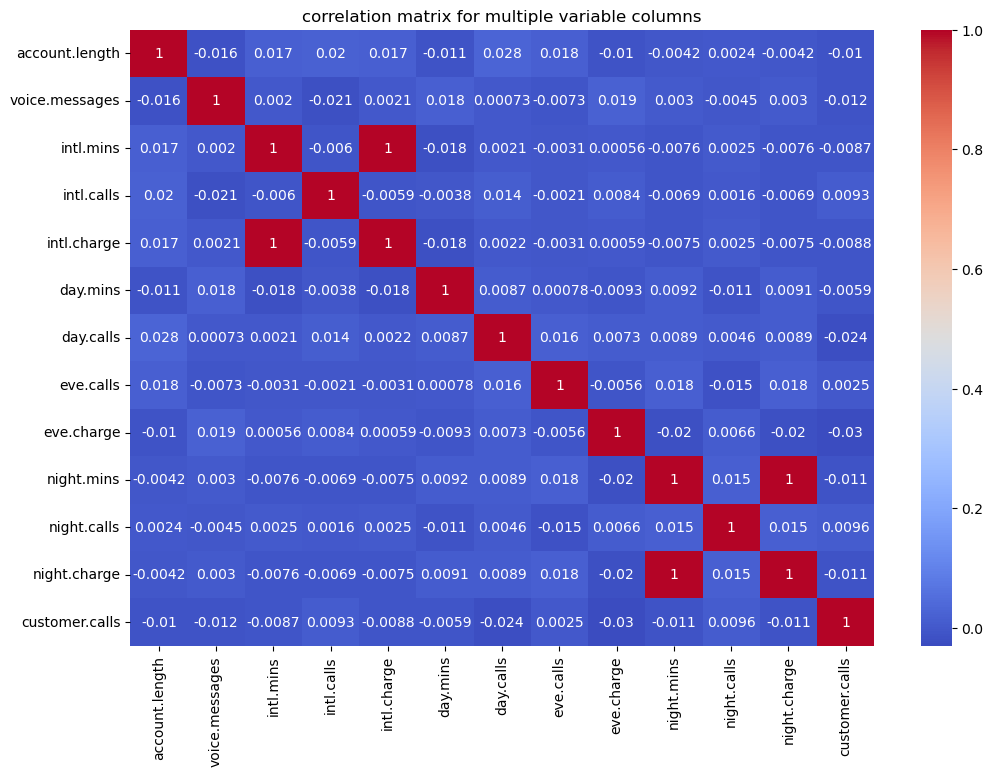

In [195]:
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix,annot = True,cmap = plt.cm.coolwarm)
plt.title("correlation matrix for multiple variable columns")
plt.show()

Identify the strong correlation

In [202]:
# Set the threshold for high correlation
threshold = 0.8

# Find pairs of features with high correlation
high_correlation = []

# Iterate over the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display the pairs with high correlation
high_correlation_df = pd.DataFrame(high_correlation, columns=["Feature 1", "Feature 2", "Correlation"])
print(high_correlation_df)

      Feature 1   Feature 2  Correlation
0   intl.charge   intl.mins     0.999991
1  night.charge  night.mins     0.999999


## Feature Engineering

In [218]:
# Create new features
df['avg_call_duration'] = df['day.mins'] / df['day.calls'].replace(0, 1)  # Avoid division by zero
df['intl_charge_per_min'] = df['intl.charge'] / df['intl.mins'].replace(0, 1)

# Check the new features
print(df[['avg_call_duration', 'intl_charge_per_min']])


      avg_call_duration  intl_charge_per_min
0              2.410000             0.270000
1              1.313821             0.270073
2              2.135088             0.269672
3              4.216901             0.269697
4              1.475221             0.270297
...                 ...                  ...
4995           1.855906             0.269697
4996           2.046667             0.270068
4997           1.579775             0.269853
4998           2.817910             0.270588
4999           1.268627             0.269892

[5000 rows x 2 columns]


## Encode Categorical Variables

In [220]:
# One-hot encode categorical features
encoded_data = pd.get_dummies(df, columns=['state', 'voice.plan', 'intl.plan'], drop_first=True)

# Display the new dataframe
print(encoded_data.head())


       area.code  account.length  voice.messages  intl.mins  intl.calls  \
0  area_code_415             128              25       10.0           3   
1  area_code_415             107              26       13.7           3   
2  area_code_415             137               0       12.2           5   
3  area_code_408              84               0        6.6           7   
4  area_code_415              75               0       10.1           3   

   intl.charge  day.mins  day.calls day.charge eve.mins  ...  state_TX  \
0         2.70     265.1        110      45.07    197.4  ...     False   
1         3.70     161.6        123      27.47    195.5  ...     False   
2         3.29     243.4        114      41.38    121.2  ...     False   
3         1.78     299.4         71       50.9     61.9  ...     False   
4         2.73     166.7        113      28.34    148.3  ...     False   

   state_UT  state_VA  state_VT  state_WA  state_WI state_WV  state_WY  \
0     False     False     Fals